In [7]:
import yfinance as yf
import pandas as pd
import numpy as np
from IPython.display import clear_output
import quantstats as qs
import warnings

from modulos.funciones import simular

warnings.filterwarnings('ignore')
pd.options.display.width = 1000

In [2]:
sp500 = pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')[0]
sp500_tickers = list(sp500.Symbol)
sp500_tickers = [e for e in sp500_tickers if e not in ('BRK.B','BF.B')]

len(sp500_tickers)

['MMM',
 'ABT',
 'ABBV',
 'ABMD',
 'ACN',
 'ATVI',
 'ADBE',
 'AMD',
 'AAP',
 'AES',
 'AFL',
 'A',
 'APD',
 'AKAM',
 'ALK',
 'ALB',
 'ARE',
 'ALXN',
 'ALGN',
 'ALLE',
 'LNT',
 'ALL',
 'GOOGL',
 'GOOG',
 'MO',
 'AMZN',
 'AMCR',
 'AEE',
 'AAL',
 'AEP',
 'AXP',
 'AIG',
 'AMT',
 'AWK',
 'AMP',
 'ABC',
 'AME',
 'AMGN',
 'APH',
 'ADI',
 'ANSS',
 'ANTM',
 'AON',
 'AOS',
 'APA',
 'AIV',
 'AAPL',
 'AMAT',
 'APTV',
 'ADM',
 'ANET',
 'AJG',
 'AIZ',
 'T',
 'ATO',
 'ADSK',
 'ADP',
 'AZO',
 'AVB',
 'AVY',
 'BKR',
 'BLL',
 'BAC',
 'BK',
 'BAX',
 'BDX',
 'BBY',
 'BIO',
 'BIIB',
 'BLK',
 'BA',
 'BKNG',
 'BWA',
 'BXP',
 'BSX',
 'BMY',
 'AVGO',
 'BR',
 'CHRW',
 'COG',
 'CDNS',
 'CPB',
 'COF',
 'CAH',
 'KMX',
 'CCL',
 'CARR',
 'CTLT',
 'CAT',
 'CBOE',
 'CBRE',
 'CDW',
 'CE',
 'CNC',
 'CNP',
 'CERN',
 'CF',
 'SCHW',
 'CHTR',
 'CVX',
 'CMG',
 'CB',
 'CHD',
 'CI',
 'CINF',
 'CTAS',
 'CSCO',
 'C',
 'CFG',
 'CTXS',
 'CLX',
 'CME',
 'CMS',
 'KO',
 'CTSH',
 'CL',
 'CMCSA',
 'CMA',
 'CAG',
 'CXO',
 'COP',
 'ED',
 

In [3]:
sp500.head(5)

,Symbol,Security,SEC filings,GICS Sector,GICS Sub-Industry,Headquarters Location,Date first added,CIK,Founded
0,MMM,3M Company,reports,Industrials,Industrial Conglomerates,"St. Paul, Minnesota",1976-08-09,66740,1902
1,ABT,Abbott Laboratories,reports,Health Care,Health Care Equipment,"North Chicago, Illinois",1964-03-31,1800,1888
2,ABBV,AbbVie Inc.,reports,Health Care,Pharmaceuticals,"North Chicago, Illinois",2012-12-31,1551152,2013 (1888)
3,ABMD,ABIOMED Inc,reports,Health Care,Health Care Equipment,"Danvers, Massachusetts",2018-05-31,815094,1981
4,ACN,Accenture plc,reports,Information Technology,IT Consulting & Other Services,"Dublin, Ireland",2011-07-06,1467373,1989
...,...,...,...,...,...,...,...,...,...
500,YUM,Yum! Brands Inc,reports,Consumer Discretionary,Restaurants,"Louisville, Kentucky",1997-10-06,1041061,1997
501,ZBRA,Zebra Technologies,reports,Information Technology,Electronic Equipment & Instruments,"Lincolnshire, Illinois",2019-12-23,877212,1969
502,ZBH,Zimmer Biomet,reports,Health Care,Health Care Equipment,"Warsaw, Indiana",2001-08-07,1136869,1927
503,ZION,Zions Bancorp,reports,Financials,Regional Banks,"Salt Lake City, Utah",2001-06-22,109380,1873


In [4]:
%%time

data_sp500 = yf.download(sp500_tickers, start='2000-01-01', end='2021-01-01')['Adj Close']

conteo = pd.DataFrame(data_sp500.count(), columns=['Q'])
sp500_tickers = list(conteo.loc[conteo.Q>1250].index)

pd.options.display.max_columns = 6
data_sp500

[*********************100%***********************]  503 of 503 completed
Wall time: 1min 20s


,A,AAL,AAP,...,ZBRA,ZION,ZTS
Date,,,,,,,
1999-12-31,NaN,NaN,NaN,...,NaN,NaN,NaN
2000-01-03,44.603386,NaN,NaN,...,25.027779,39.996193,NaN
2000-01-04,41.196171,NaN,NaN,...,24.666666,38.059437,NaN
2000-01-05,38.640766,NaN,NaN,...,25.138889,38.014412,NaN
2000-01-06,37.169479,NaN,NaN,...,23.777779,38.554890,NaN
...,...,...,...,...,...,...,...
2020-12-01,115.360001,14.270000,152.610001,...,372.170013,40.070000,161.360001
2020-12-02,114.570000,14.860000,148.449997,...,367.209991,41.599998,158.949997
2020-12-03,113.580002,16.090000,150.139999,...,372.369995,42.419998,157.070007


In [5]:
len(sp500_tickers)

490

In [6]:
np.random.dirichlet(np.ones(5),1)

array([[0.25994447, 0.12980504, 0.38147145, 0.16339494, 0.0653841 ]])

In [7]:
w_min, w_max = 0.05, 0.5  
n_stocks = 5

ponds = np.random.dirichlet(np.ones(n_stocks),100)
oks = [w for w in ponds if (w.min()>w_min) & (w.max()<w_max)]
oks[0]

array([0.05409074, 0.20591276, 0.11855572, 0.39982447, 0.22161631])

In [69]:
meses = pd.date_range(start='1/1/2000', end='31/12/2020', freq='MS')
meses_from = list(meses[:-1])
meses_to = list(meses[1:])
print(len(meses))
meses

252


DatetimeIndex(['2000-01-01', '2000-02-01', '2000-03-01', '2000-04-01', '2000-05-01', '2000-06-01', '2000-07-01', '2000-08-01', '2000-09-01', '2000-10-01',
               ...
               '2020-03-01', '2020-04-01', '2020-05-01', '2020-06-01', '2020-07-01', '2020-08-01', '2020-09-01', '2020-10-01', '2020-11-01', '2020-12-01'], dtype='datetime64[ns]', length=252, freq='MS')

In [68]:
dfs_m = []
rets_log = np.log(data_sp500/data_sp500.shift(1))
for i in range (len(meses_from)):
    df = rets_log.loc[(rets_log.index >= meses_from[i]) & (rets_log.index <= meses_to[i])].copy()
    df.dropna(axis=1, thresh=30, inplace=True)
    dfs_m.append(df)

In [71]:
meses_from

[Timestamp('2000-01-01 00:00:00', freq='MS'),
 Timestamp('2000-02-01 00:00:00', freq='MS'),
 Timestamp('2000-03-01 00:00:00', freq='MS'),
 Timestamp('2000-04-01 00:00:00', freq='MS'),
 Timestamp('2000-05-01 00:00:00', freq='MS'),
 Timestamp('2000-06-01 00:00:00', freq='MS'),
 Timestamp('2000-07-01 00:00:00', freq='MS'),
 Timestamp('2000-08-01 00:00:00', freq='MS'),
 Timestamp('2000-09-01 00:00:00', freq='MS'),
 Timestamp('2000-10-01 00:00:00', freq='MS'),
 Timestamp('2000-11-01 00:00:00', freq='MS'),
 Timestamp('2000-12-01 00:00:00', freq='MS'),
 Timestamp('2001-01-01 00:00:00', freq='MS'),
 Timestamp('2001-02-01 00:00:00', freq='MS'),
 Timestamp('2001-03-01 00:00:00', freq='MS'),
 Timestamp('2001-04-01 00:00:00', freq='MS'),
 Timestamp('2001-05-01 00:00:00', freq='MS'),
 Timestamp('2001-06-01 00:00:00', freq='MS'),
 Timestamp('2001-07-01 00:00:00', freq='MS'),
 Timestamp('2001-08-01 00:00:00', freq='MS'),
 Timestamp('2001-09-01 00:00:00', freq='MS'),
 Timestamp('2001-10-01 00:00:00', 

In [70]:
dfs_m[0]

""
Date
2000-01-03
2000-01-04
2000-01-05
2000-01-06
2000-01-07
2000-01-10
2000-01-11
2000-01-12
2000-01-13


In [39]:
trimestres = pd.date_range(start='1/1/2000', end='31/12/2020', freq='Q')
trimestres_from = list(trimestres[:-1])
trimestres_to = list(trimestres[1:])
print(len(trimestres))
trimestres

84


DatetimeIndex(['2000-03-31', '2000-06-30', '2000-09-30', '2000-12-31', '2001-03-31', '2001-06-30', '2001-09-30', '2001-12-31', '2002-03-31', '2002-06-30', '2002-09-30', '2002-12-31', '2003-03-31', '2003-06-30', '2003-09-30', '2003-12-31', '2004-03-31', '2004-06-30', '2004-09-30', '2004-12-31', '2005-03-31', '2005-06-30', '2005-09-30', '2005-12-31', '2006-03-31', '2006-06-30', '2006-09-30', '2006-12-31', '2007-03-31', '2007-06-30', '2007-09-30', '2007-12-31', '2008-03-31', '2008-06-30', '2008-09-30', '2008-12-31', '2009-03-31', '2009-06-30', '2009-09-30', '2009-12-31', '2010-03-31', '2010-06-30', '2010-09-30', '2010-12-31', '2011-03-31', '2011-06-30', '2011-09-30', '2011-12-31', '2012-03-31', '2012-06-30', '2012-09-30', '2012-12-31', '2013-03-31', '2013-06-30', '2013-09-30', '2013-12-31', '2014-03-31', '2014-06-30', '2014-09-30', '2014-12-31', '2015-03-31', '2015-06-30', '2015-09-30', '2015-12-31', '2016-03-31', '2016-06-30', '2016-09-30', '2016-12-31', '2017-03-31', '2017-06-30',
     

In [66]:
dfs = []
rets_log = np.log(data_sp500/data_sp500.shift(1))
for i in range (len(trimestres_from)):
    df = rets_log.loc[(rets_log.index >= trimestres_from[i]) & (rets_log.index <= trimestres_to[i])].copy()
    df.dropna(axis=1, thresh=30, inplace=True)
    dfs.append(df)

In [67]:
dfs[0]

,A,AAPL,ABC,ABMD,ABT,ADBE,...,XOM,XRAY,XRX,YUM,ZBRA,ZION
Date,,,,,,,,,,,,,
2000-03-31,-0.009570,0.076979,0.033901,0.060432,-0.008842,0.037762,...,-0.007982,0.047360,-0.021404,-0.008016,0.035627,0.082925
2000-04-03,-0.059423,-0.018579,-0.025318,-0.057158,0.050227,-0.053038,...,0.031549,-0.035878,-0.036724,-0.024441,-0.042125,-0.039821
2000-04-04,-0.047006,-0.046051,0.062132,-0.023142,0.063799,-0.036784,...,0.024541,0.002281,0.012392,0.028456,-0.011803,0.039821
2000-04-05,0.036105,0.023770,0.031623,-0.030563,-0.060427,0.052061,...,-0.033902,0.002275,0.004914,0.033501,0.036273,-0.012085
2000-04-06,0.079894,-0.040603,0.045635,0.135254,0.018349,0.067086,...,0.024769,0.003970,0.070952,-0.021549,0.075924,0.032888
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2000-06-26,0.000000,0.046080,0.051403,-0.005500,0.015338,0.057247,...,0.002816,-0.012024,-0.009419,0.013761,-0.012959,-0.001311
2000-06-27,0.004151,-0.044872,-0.064678,-0.144091,0.012103,-0.054596,...,-0.015680,-0.039059,-0.035317,-0.002280,0.020087,-0.002628
2000-06-28,0.052452,0.050629,0.056292,0.055742,0.023041,0.055598,...,0.000762,0.051083,0.044736,-0.002286,0.025247,-0.002635


In [12]:
retornos = np.log((df/df.shift(1)).dropna())
ret_log = np.log(data_sp500/data_sp500.shift(1))

portfolios = simular(ret_log, sp500_tickers, 25000,5)
print('\n',portfolios.head(10))

100%|███████████████████████████████████████████████████████████████████████████| 25000/25000 [02:24<00:00, 172.71it/s]

                               activos                                        weights   retorno  volatilidad  Sharpe Simple
20965     [PEP, JCI, ARE, CHTR, PAYC]  [0.21497, 0.08954, 0.07511, 0.26427, 0.35611]  0.279987     0.242406        1.15504
18260        [INFO, MA, PG, GL, PAYC]   [0.16589, 0.40147, 0.10622, 0.05051, 0.2759]  0.304895     0.269333        1.13204
14473    [NEE, ITW, ROK, GOOGL, PAYC]  [0.32469, 0.11132, 0.09223, 0.11758, 0.35418]  0.283970     0.251116        1.13083
21052    [APTV, ANSS, PAYC, ADM, NKE]  [0.20276, 0.24413, 0.30623, 0.05331, 0.19357]  0.301959     0.276520        1.09199
543       [CB, RSG, NDAQ, CHTR, PAYC]   [0.27082, 0.12328, 0.1464, 0.16369, 0.29581]  0.269649     0.246942        1.09196
16108        [ED, DD, NOW, SNA, CHTR]   [0.18522, 0.05328, 0.40654, 0.1083, 0.24666]  0.245665     0.230451        1.06601
3230      [KMB, P

In [13]:
portfolios

,activos,weights,retorno,volatilidad,Sharpe Simple
20965,"[PEP, JCI, ARE, CHTR, PAYC]","[0.21497, 0.08954, 0.07511, 0.26427, 0.35611]",0.279987,0.242406,1.15504
18260,"[INFO, MA, PG, GL, PAYC]","[0.16589, 0.40147, 0.10622, 0.05051, 0.2759]",0.304895,0.269333,1.13204
14473,"[NEE, ITW, ROK, GOOGL, PAYC]","[0.32469, 0.11132, 0.09223, 0.11758, 0.35418]",0.283970,0.251116,1.13083
21052,"[APTV, ANSS, PAYC, ADM, NKE]","[0.20276, 0.24413, 0.30623, 0.05331, 0.19357]",0.301959,0.276520,1.09199
543,"[CB, RSG, NDAQ, CHTR, PAYC]","[0.27082, 0.12328, 0.1464, 0.16369, 0.29581]",0.269649,0.246942,1.09196
...,...,...,...,...,...
8206,"[UA, FISV, CTAS, SYF, TXT]","[0.471, 0.19029, 0.17178, 0.09968, 0.06725]",-0.093201,0.366444,-0.25434
9814,"[TFC, IFF, BSX, UA, ABMD]","[0.21891, 0.22861, 0.05329, 0.43071, 0.06848]",-0.092832,0.340910,-0.27231
21941,"[NEE, CFG, IFF, UA, PHM]","[0.08554, 0.13695, 0.14473, 0.48778, 0.145]",-0.101044,0.369174,-0.27370
9013,"[BKR, L, UA, LVS, FE]","[0.1211, 0.17161, 0.4316, 0.20067, 0.07502]",-0.106482,0.368064,-0.28930


In [14]:
top = portfolios.iloc[ : 100]
lista_tickers = list(top.activos.apply(pd.Series).stack())
len(lista_tickers)
np.unique(lista_tickers, return_counts=True)
freq = pd.DataFrame(np.unique(lista_tickers, return_counts=True)).T
freq.columns=['Ticker','Frecuencia']
freq.sort_values('Frecuencia', ascending=False).head(10)

,Ticker,Frecuencia
162,PAYC,45
45,CHTR,19
152,NOW,14
63,DG,9
176,PYPL,7
136,MA,7
26,AVGO,7
242,ZTS,6
143,MNST,6
41,CDW,6


In [15]:
%%time
q_inicial = 1000   
lista_tickers = sp500_tickers
ret_log = np.log(data_sp500/data_sp500.shift(1))

portfolios = simular(ret_log, lista_tickers, q_inicial, n_stocks=5, w_min=0.05, w_max=0.50)

best = pd.DataFrame()
for i in range(8): 
    qsim = int(q_inicial/(i+2))   
    qtop = qsim // 3 
    
    top = portfolios.iloc[ : qtop]
    lista_tickers = list(np.array(top.activos.apply(pd.Series).stack()))
    portfolios = simular(ret_log, lista_tickers, qsim)
    best = pd.concat([best,portfolios.iloc[:10]])

print('Mejores\n',best.sort_values('Sharpe Simple', ascending=False).head(10))

100%|███████████████████████████████████████████████████████████████████████████████| 111/111 [00:00<00:00, 180.78it/s]
Mejores
                           activos                                        weights   retorno  volatilidad  Sharpe Simple
33    [CHTR, AWK, PAYC, CHTR, DG]   [0.08056, 0.12741, 0.32138, 0.2084, 0.26224]  0.315519     0.227114        1.38925
57     [PAYC, CHTR, DG, ZTS, DPZ]  [0.21853, 0.27968, 0.14549, 0.28379, 0.07251]  0.293148     0.213004        1.37626
113    [PAYC, CDW, CHTR, CDW, DG]    [0.33637, 0.092, 0.25788, 0.06289, 0.25085]  0.331790     0.241155        1.37584
13      [MA, DG, PAYC, NOW, CHTR]   [0.18938, 0.35476, 0.1634, 0.11246, 0.18001]  0.299886     0.218958        1.36960
25   [AVGO, PAYC, NOW, CHTR, CHD]   [0.1222, 0.29964, 0.10494, 0.34475, 0.12847]  0.339378     0.249448        1.36052
4     [CHTR, AWK, MA, PAYC, KEYS]  [0.37128, 0.14797, 0.09023, 0.24635, 0.14416]  0.312888     0.230950        1.35479
2      [PAYC, CHTR, DPZ, DG, CHD]  [0.

In [16]:
def top10(ret_log, lista_tickers, q_inicial=1000, rondas=10, n_inicial=5):
    portfolios = simular(ret_log, lista_tickers, q_inicial, n_stocks=n_inicial, w_min=0.05, w_max=0.50)
    best = pd.DataFrame()
    for i in range(rondas):
        qsim = int(q_inicial/(i+2))
        qtop = qsim//3

        top = portfolios.iloc[ : qtop]
        lista_tickers = list(np.array(top.activos.apply(pd.Series).stack()))
        portfolios = simular(ret_log, lista_tickers, qsim)
        best = pd.concat([best,portfolios.iloc[:10]])

    top10 = best.sort_values('Sharpe Simple', ascending=False).head(10)
    return top10

In [ ]:
%%time 

tops = []
for i, df in enumerate(dfs):
    clear_output(wait=True)
    print('Proceso N°',i+1,'de',len(dfs))
    print('Desde',trimestres_from[i],'Hasta',trimestres_to[i],'\n')
    top = top10(df, list(df.columns), q_inicial=500, rondas=5)
    tops.append(top.iloc[:10]) 

In [18]:
activos, weights = [], []
for i in range(10):
    activos.append([df.iloc[i].activos for df in tops])
    weights.append([df.iloc[i].weights for df in tops])

In [19]:
resumen = pd.DataFrame() 
pd.options.display.max_columns=10
for top_nro in range(10):
    lista_rendimientos = []
    for i in range(1,len(dfs)):
        filtro_fecha = data_sp500.loc[(data_sp500.index >= trimestres_from[i]) & (data_sp500.index <= trimestres_to[i])]
        filtro_activos = filtro_fecha[activos[top_nro][i-1]].dropna()
        r = filtro_activos.pct_change()
        w = weights[top_nro][i-1]
        fechas = pd.to_datetime(filtro_activos.index)
        lista_rendimientos.append(pd.Series(np.dot(r, w), index=fechas).dropna())

    rendimientos = pd.concat(lista_rendimientos)
    resumen['Test_'+str(top_nro)] = (rendimientos+1).cumprod()

resumen

,Test_0,Test_1,Test_2,Test_3,Test_4,Test_5,Test_6,Test_7,Test_8,Test_9
Date,,,,,,,,,,
2000-07-03,1.002059,1.010240,1.003266,0.992022,1.004254,0.996596,0.996655,0.989597,1.004446,0.992010
2000-07-05,1.035572,1.034679,1.032548,1.006087,1.021964,0.987733,0.999346,0.997208,1.033992,0.990070
2000-07-06,1.032146,1.063119,1.034548,1.040534,1.034674,1.012392,1.028154,1.037165,1.040958,0.996207
2000-07-07,1.029522,1.052055,1.026556,1.037091,1.021521,1.025626,1.033549,1.033408,1.042846,1.000477
2000-07-10,1.043080,1.045978,1.036424,1.028198,1.013930,1.027573,1.043100,1.018994,1.055356,1.022006
...,...,...,...,...,...,...,...,...,...,...
2020-12-01,52.685568,27.524738,46.937058,68.962337,13.539937,26.483605,61.654698,58.910273,44.658709,26.790273
2020-12-02,52.623504,27.859647,47.453795,69.920454,13.552576,26.870853,62.151276,59.291890,45.104158,26.699092
2020-12-03,52.763821,27.647082,46.999035,69.676003,13.528669,26.721605,62.370283,58.854468,44.801348,26.766086


In [20]:
inicio = list(resumen.index)[0].isoformat()[:10]
inicio
spy = yf.download('SPY', start=inicio, auto_adjust=True)
spy['pctChange'] = spy.Close.pct_change()
spy['rendimiento_acum'] = (spy.pctChange+1).cumprod()

[*********************100%***********************]  1 of 1 completed


[]

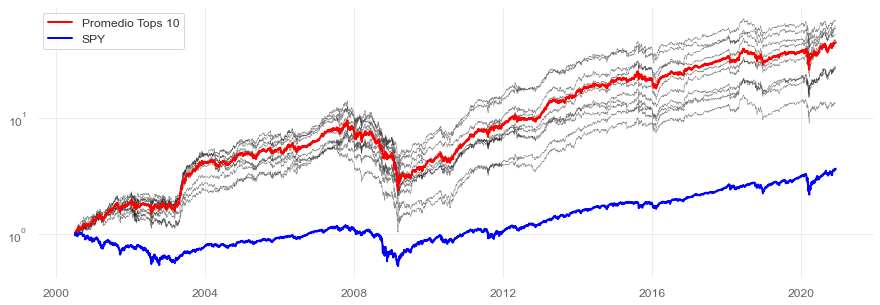

In [21]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(15,5))

for columna in resumen.columns:
    ax.plot(resumen[columna], 'k', alpha=0.5, lw=0.5)
    ax.set_yscale('log')

ax.plot(resumen.iloc[:,:-1].mean(axis=1), 'red', lw=2, label='Promedio Tops 10')
ax.plot(spy['rendimiento_acum'], 'blue', lw=2, label='SPY')

ax.legend()
ax.plot()

In [22]:
estrategia = resumen.iloc[:,:-1].mean(axis=1) 
estrategia

Date
2000-07-03     0.999904
2000-07-05     1.016570
2000-07-06     1.035966
2000-07-07     1.033575
2000-07-10     1.034737
                ...    
2020-12-01    44.595214
2020-12-02    44.980906
2020-12-03    44.818035
2020-12-04    44.980841
2020-12-07    45.120583
Length: 5114, dtype: float64

In [23]:
qs.extend_pandas()
pd.options.display.max_columns=13
qs.stats.monthly_returns(estrategia)

,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,EOY
2000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.089176,0.043214,0.082515,-0.008605,-0.023692,0.134343,0.310599
2001,0.055293,-0.000545,-0.017930,0.053491,0.065511,0.064715,0.051758,0.006200,-0.034611,0.009414,0.038882,0.045730,0.345825
2002,-0.015270,-0.101102,0.048777,0.057760,-0.017991,0.002065,-0.074953,0.057393,-0.026317,0.022727,0.016781,-0.059830,-0.069827
2003,0.045720,-0.043158,0.052594,0.185532,0.360914,0.112329,0.055368,0.028206,0.035877,0.097784,0.070864,-0.007917,0.948079
2004,-0.011554,0.043940,0.009693,-0.100218,0.068242,0.024634,-0.044894,-0.003715,0.082387,0.019835,0.102488,0.010808,0.196706
2005,-0.013288,0.003833,-0.027787,-0.047199,0.047636,0.077933,0.025003,-0.001289,0.041582,-0.082975,0.027666,0.036836,0.092009
2006,-0.054848,0.057849,0.096292,-0.005254,-0.056874,0.017122,-0.000517,0.021673,-0.000840,0.023455,0.080096,0.004481,0.186974
2007,0.050789,0.068063,0.049133,0.022561,0.048900,-0.015140,0.010182,0.004344,0.091294,0.024889,-0.081749,-0.047388,0.239983
2008,-0.094462,0.013300,-0.043548,0.040676,0.005667,-0.016984,-0.117578,0.029920,-0.164808,-0.069021,-0.049078,-0.002051,-0.413815
2009,-0.226254,-0.194560,0.010256,0.076408,-0.025417,0.013317,0.103420,0.001127,0.075379,-0.073826,0.079853,0.117170,-0.026759


In [24]:
estrategia = resumen.iloc[:,:-1].mean(axis=1) 
benchmark = spy['rendimiento_acum']
qs.reports.metrics(estrategia, benchmark, mode='full')

                           Strategy    Benchmark
-------------------------  ----------  -----------
Start Period               2000-07-03  2000-07-03
End Period                 2020-12-07  2020-12-07
Risk-Free Rate             0.0%        0.0%
Time in Market             100.0%      100.0%

Cumulative Return          4,412.49%   274.73%
CAGR%                      20.48%      6.68%
Sharpe                     0.89        0.43
Sortino                    1.27        0.6
Max Drawdown               -75.14%     -55.19%
Longest DD Days            1581        2241
Volatility (ann.)          24.56%      19.79%
R^2                        0.46        0.46
Calmar                     0.27        0.12
Skew                       -0.28       -0.03
Kurtosis                   6.19        12.78

Expected Daily %           0.07%       0.03%
Expected Monthly %         1.56%       0.54%
Expected Yearly %          19.89%      6.49%
Kelly Criterion            6.27%       0.5%
Risk of Ruin               0.0%    

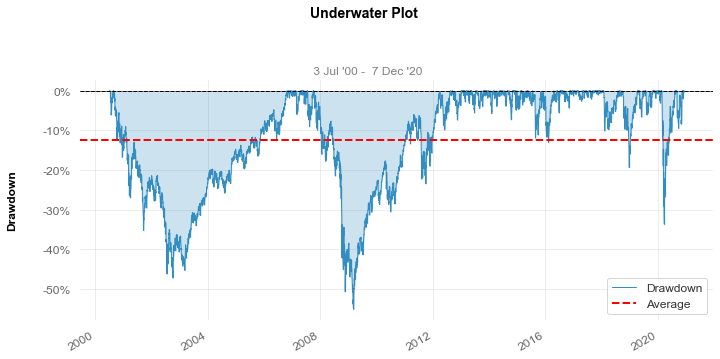

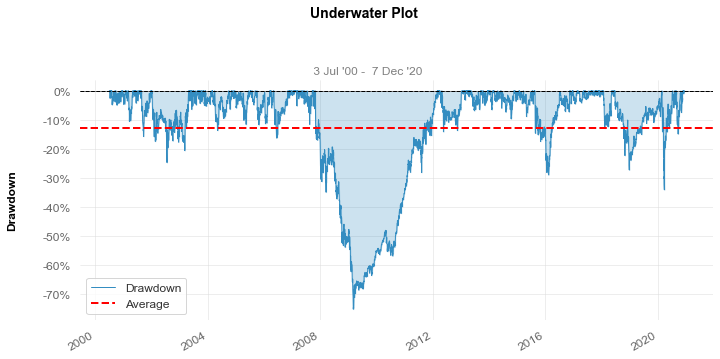

In [25]:
qs.plots.drawdown(benchmark)
qs.plots.drawdown(estrategia)

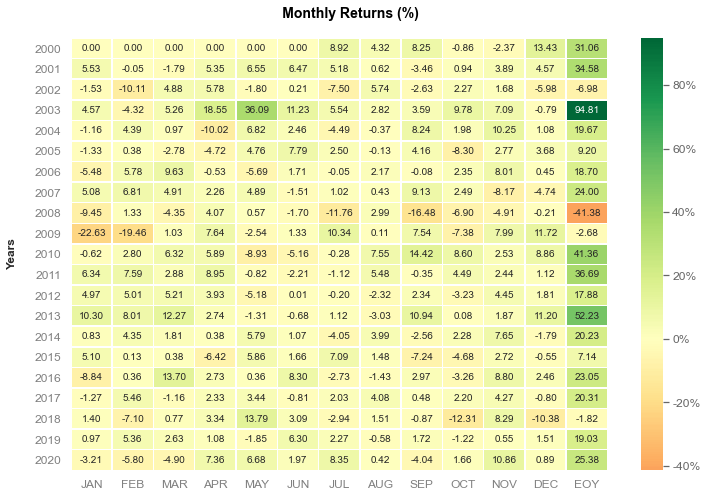

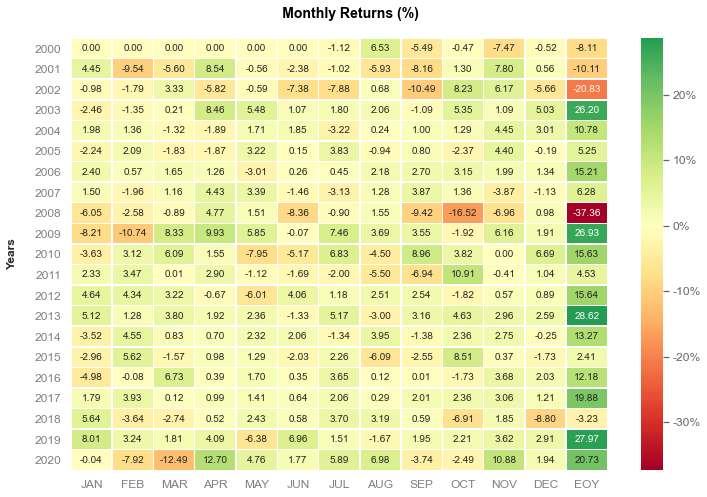

In [26]:
qs.plots.monthly_returns(estrategia, eoy=True)
qs.plots.monthly_returns(benchmark, eoy=True)

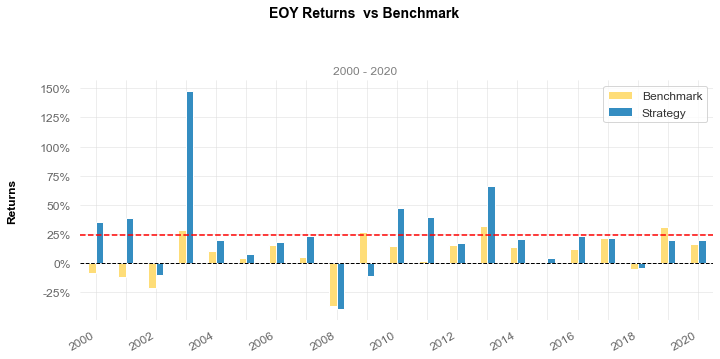

In [27]:
qs.plots.yearly_returns(estrategia, benchmark)

In [28]:
RiskFree = pd.DataFrame(index=estrategia.index)
RiskFree = 0.0001 
EstrategiaPareto = estrategia.pct_change()*0.2 + RiskFree*0.8

EstrategiaPareto

Date
2000-07-03         NaN
2000-07-05    0.003414
2000-07-06    0.003896
2000-07-07   -0.000382
2000-07-10    0.000305
                ...   
2020-12-01   -0.000489
2020-12-02    0.001810
2020-12-03   -0.000644
2020-12-04    0.000807
2020-12-07    0.000701
Length: 5114, dtype: float64

In [29]:
qs.reports.metrics(EstrategiaPareto, benchmark, mode='full')

                           Strategy    Benchmark
-------------------------  ----------  -----------
Start Period               2000-07-03  2000-07-03
End Period                 2020-12-07  2020-12-07
Risk-Free Rate             0.0%        0.0%
Time in Market             100.0%      100.0%

Cumulative Return          255.86%     274.73%
CAGR%                      6.41%       6.68%
Sharpe                     1.3         0.43
Sortino                    1.88        0.6
Max Drawdown               -20.42%     -55.19%
Longest DD Days            1129        2241
Volatility (ann.)          4.91%       19.79%
R^2                        0.46        0.46
Calmar                     0.31        0.12
Skew                       -0.28       -0.03
Kurtosis                   6.19        12.78

Expected Daily %           0.02%       0.03%
Expected Monthly %         0.52%       0.54%
Expected Yearly %          6.23%       6.49%
Kelly Criterion            10.48%      -0.58%
Risk of Ruin               0.0%  

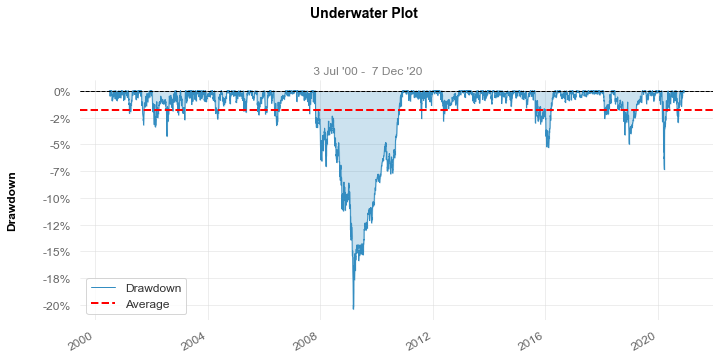

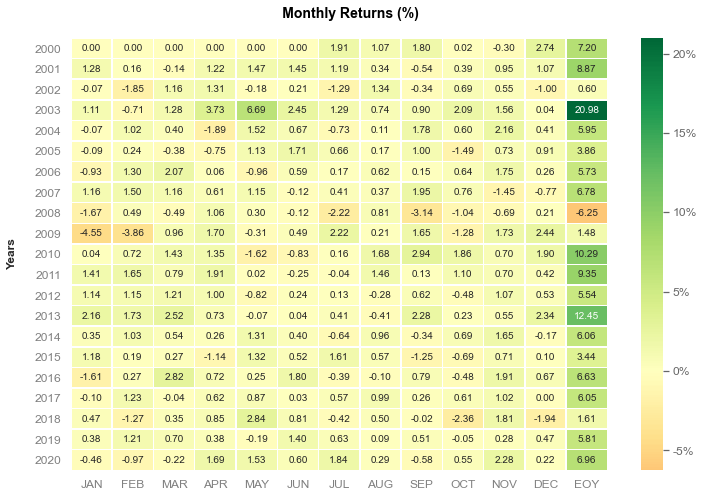

In [30]:
qs.plots.drawdown(EstrategiaPareto)
qs.plots.monthly_returns(EstrategiaPareto, eoy=True)

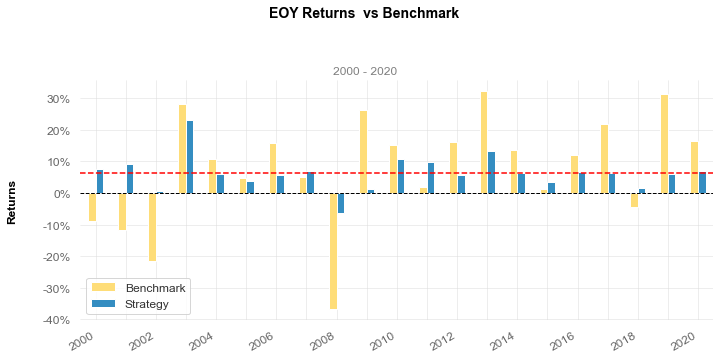

In [31]:
qs.plots.yearly_returns(EstrategiaPareto, benchmark)

                           Strategy
-------------------------  ----------
Start Period               2000-07-03
End Period                 2020-12-07
Risk-Free Rate             0.0%
Time in Market             100.0%

Cumulative Return          255.86%
CAGR%                      6.41%
Sharpe                     1.3
Sortino                    1.88
Max Drawdown               -20.42%
Longest DD Days            1129
Volatility (ann.)          4.91%
Calmar                     0.31
Skew                       -0.28
Kurtosis                   6.19

Expected Daily %           0.02%
Expected Monthly %         0.52%
Expected Yearly %          6.23%
Kelly Criterion            11.92%
Risk of Ruin               0.0%
Daily Value-at-Risk        -0.48%
Expected Shortfall (cVaR)  -0.48%

Payoff Ratio               0.98
Profit Factor              1.27
Common Sense Ratio         1.23
CPC Index                  0.7
Tail Ratio                 0.97
Outlier Win Ratio          4.06
Outlier Loss Ratio         4.

None

,Start,Valley,End,Days,Max Drawdown,99% Max Drawdown
1,2007-10-30,2009-03-05,2010-12-02,1129,-20.418562,-17.675640
2,2020-02-21,2020-03-23,2020-05-11,80,-7.357169,-6.853693
3,2015-08-18,2016-02-11,2016-05-02,258,-5.304423,-5.246719
4,2018-06-21,2018-12-24,2019-06-11,355,-4.988903,-4.120571
5,2002-01-10,2002-07-23,2002-11-06,300,-4.250561,-3.378781


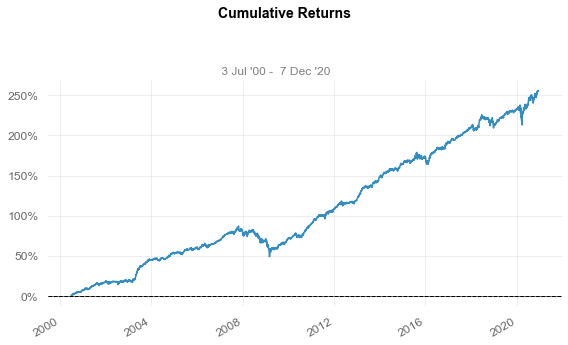

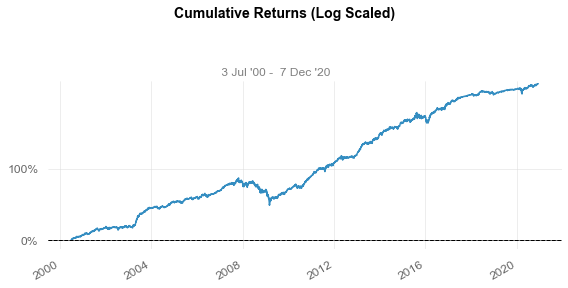

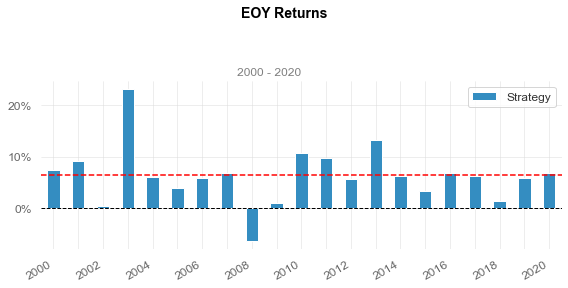

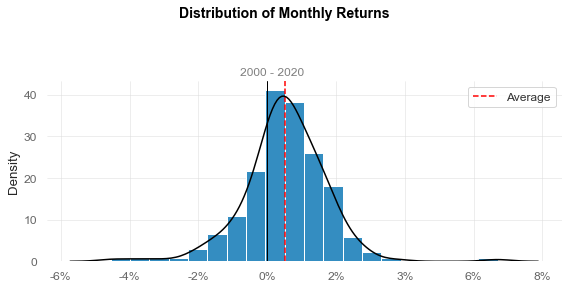

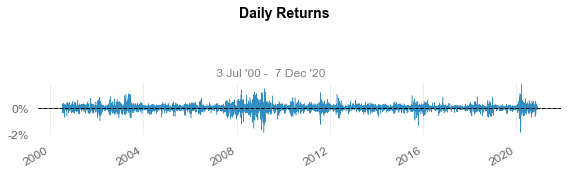

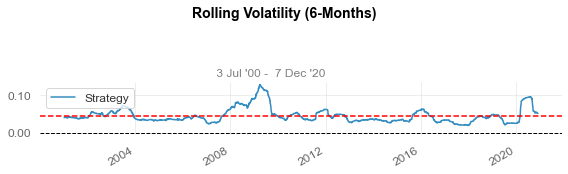

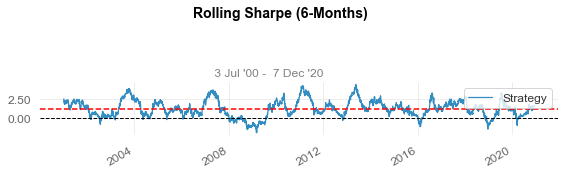

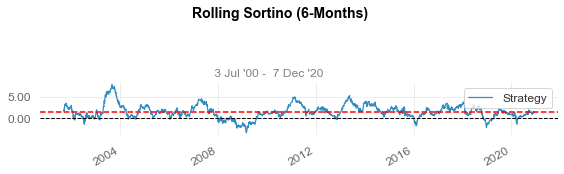

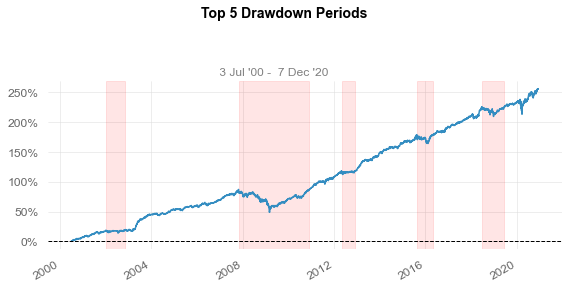

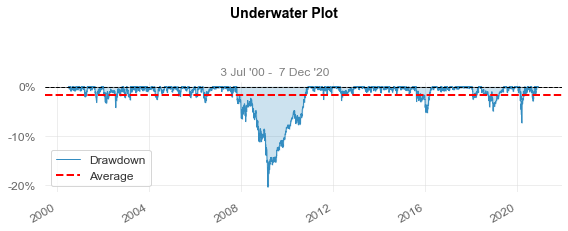

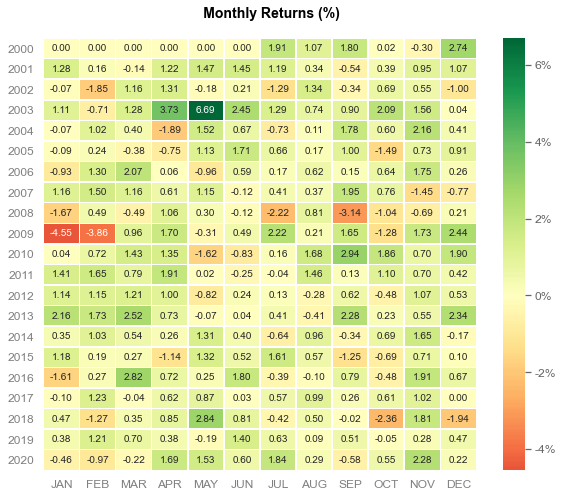

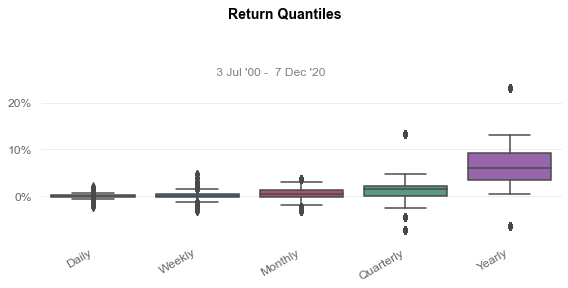

In [32]:
qs.reports.full(EstrategiaPareto)